# Project 2 - Healthcare

**Problem Statement**

    NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments  for the most chronic, costly, and consequential diseases.
    
    The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has      diabetes, based on certain diagnostic measurements included in the dataset.
    
    Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Dataset Description**

    The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables         includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

    Pregnancies 	              Number of times pregnant
    Glucose 	                  Plasma glucose concentration in an oral glucose tolerance test
    BloodPressure 	            Diastolic blood pressure (mm Hg)
    SkinThickness 	            Triceps skinfold thickness (mm)
    Insulin 	                  Two hour serum insulin
    BMI 	                      Body Mass Index
    DiabetesPedigreeFunction      Diabetes pedigree function
    Age 	                      Age in years
    Outcome 	                  Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('E:/Simplilearn/Capstone Projects/Project 2/health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Week 1 : Descriptive Analysis - 

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [3]:
#Checking for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There seems to be no missing values in the dataframe.

In [4]:
# to check if Glucose, BloodPressure, SkinThickness, Insulin, BMI have 0 as values 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


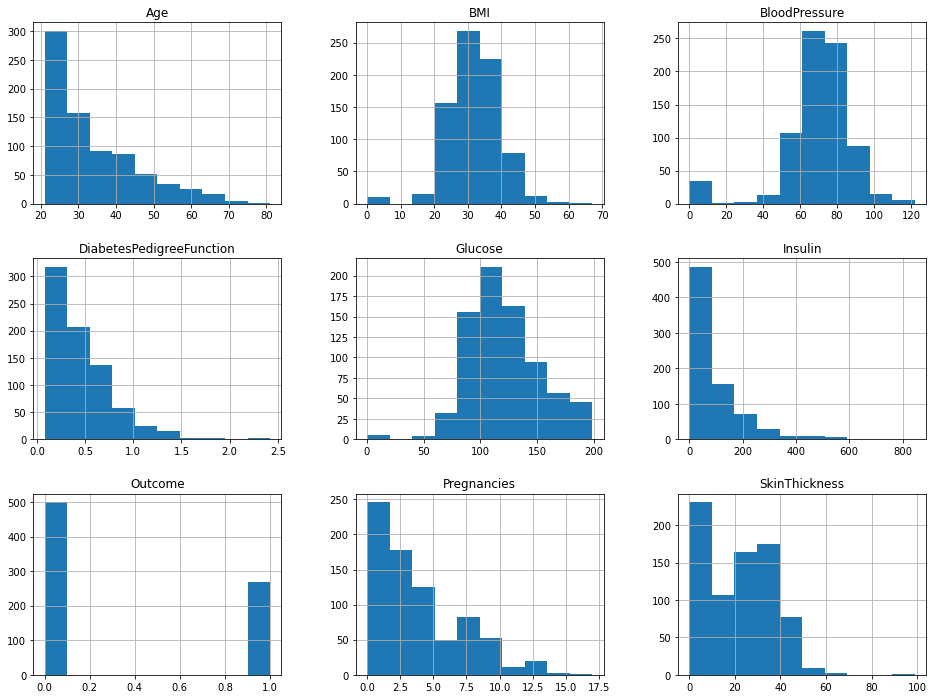

In [5]:
#Visualizations

# Distribution of variables using Histogram
df.hist(figsize=(16,12));

Glucose, BloodPressure, SkinThickness, Insulin, BMI Indeed have 0 as values and we would be treating them by replacing 0s with the mean values for the variables

In [6]:
df [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN)

df.fillna(df.mean(), inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


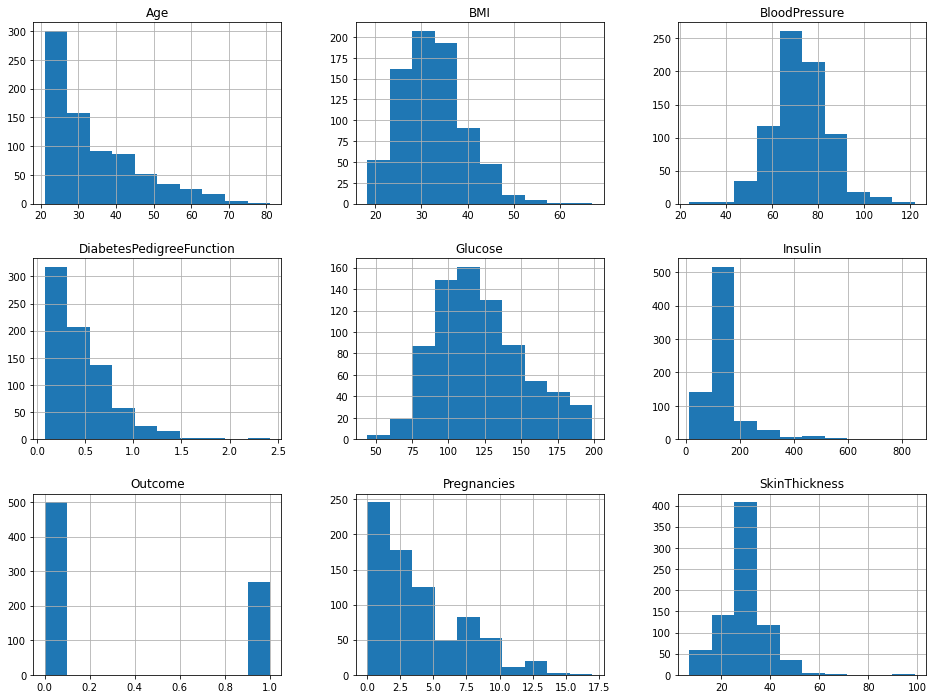

In [7]:
df.hist(figsize=(16,12));

As can be seen above, the 0s have been replaces with the mean values.

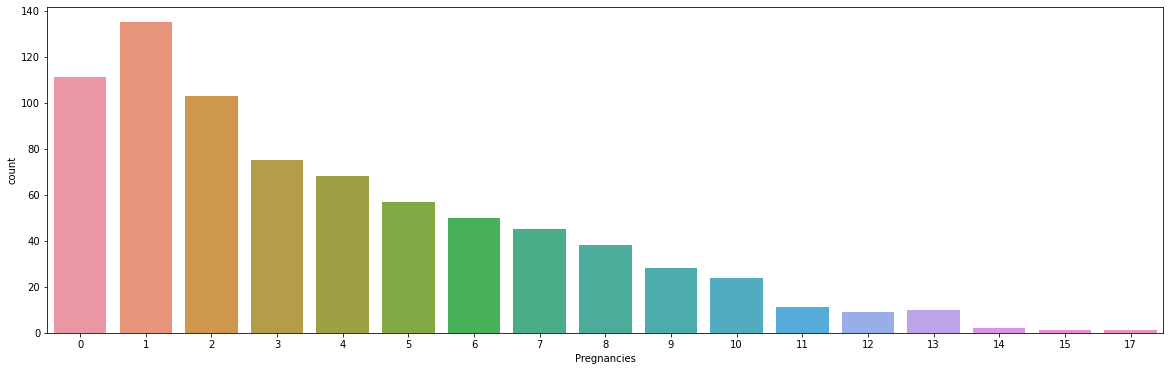

In [8]:
# Count plot for Pregnancies 
plt.figure(figsize=(20, 6))
sns.countplot(df['Pregnancies'])

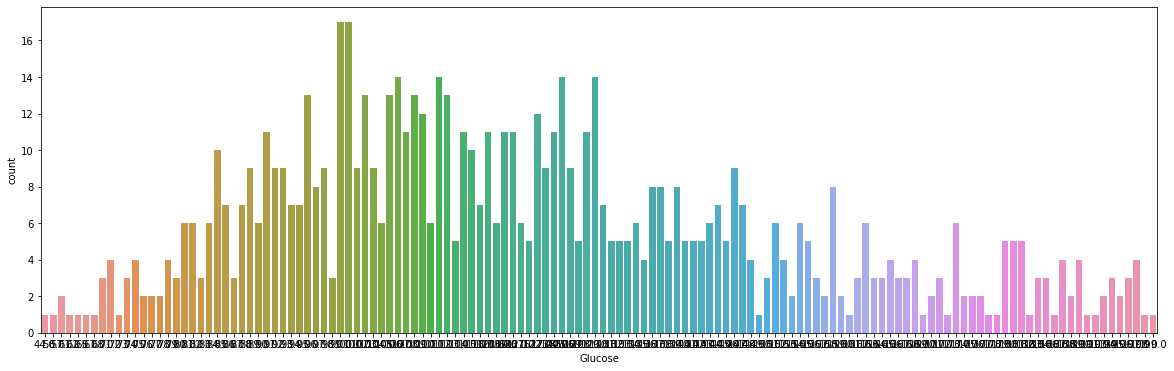

In [9]:
# Count plot for Glucose 
plt.figure(figsize=(20, 6))
sns.countplot(df['Glucose'])

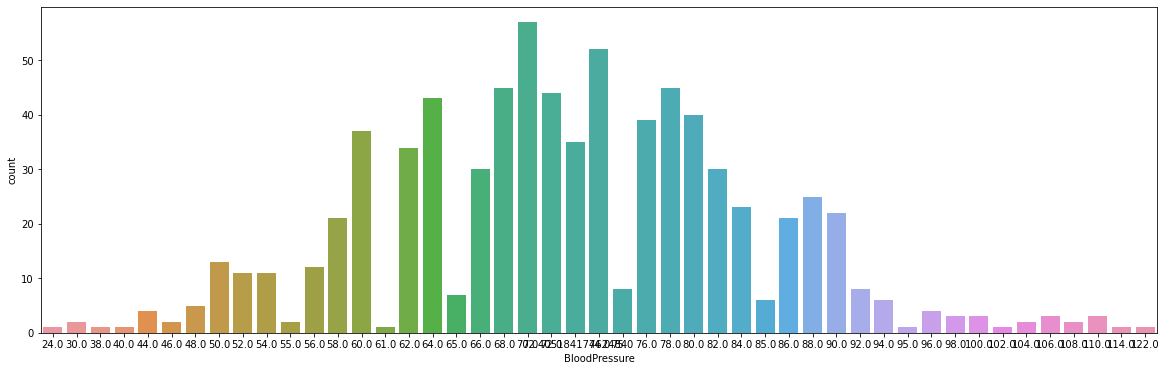

In [10]:
# Count plot for BloodPressure 
plt.figure(figsize=(20, 6))
sns.countplot(df['BloodPressure'])

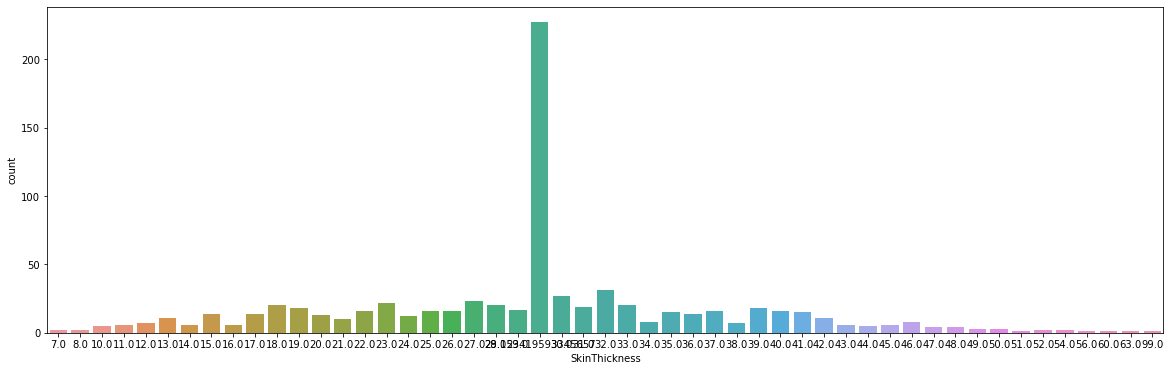

In [11]:
# Count plot for SkinThickness 
plt.figure(figsize=(20, 6))
sns.countplot(df['SkinThickness'])

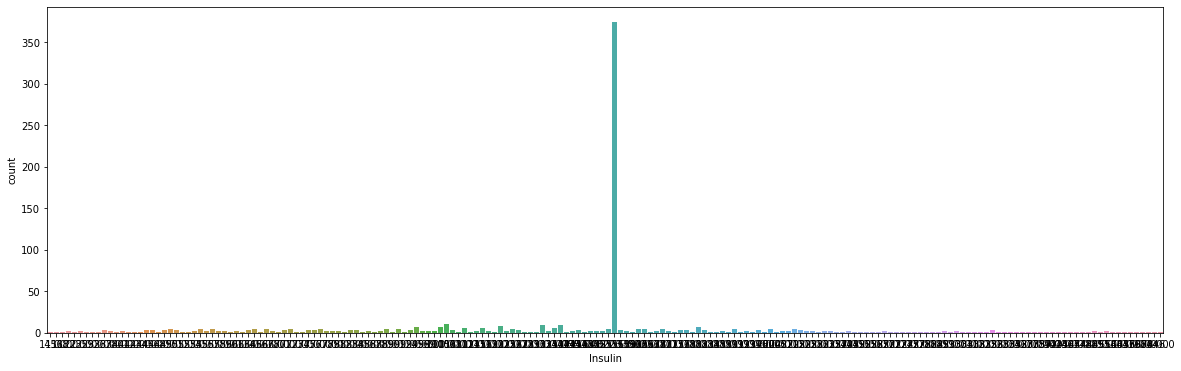

In [12]:
# Count plot for Insulin 
plt.figure(figsize=(20, 6))
sns.countplot(df['Insulin'])

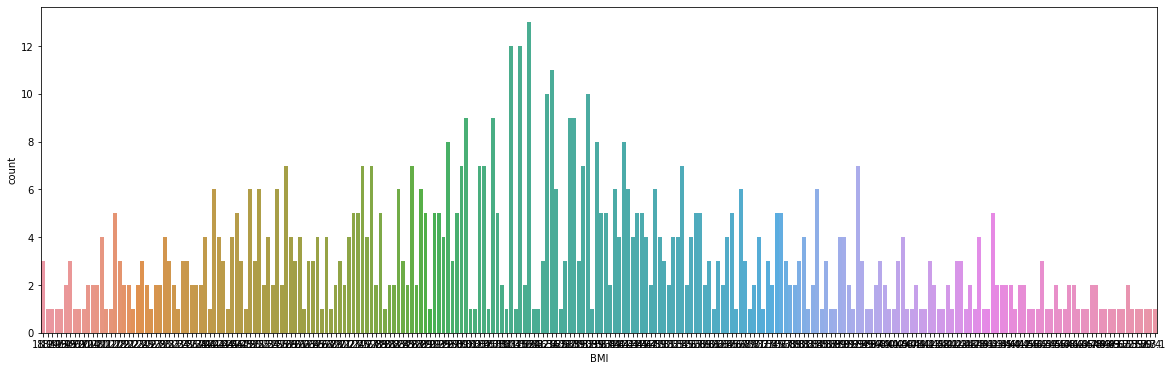

In [13]:
# Count plot for BMI 
plt.figure(figsize=(20, 6))
sns.countplot(df['BMI'])

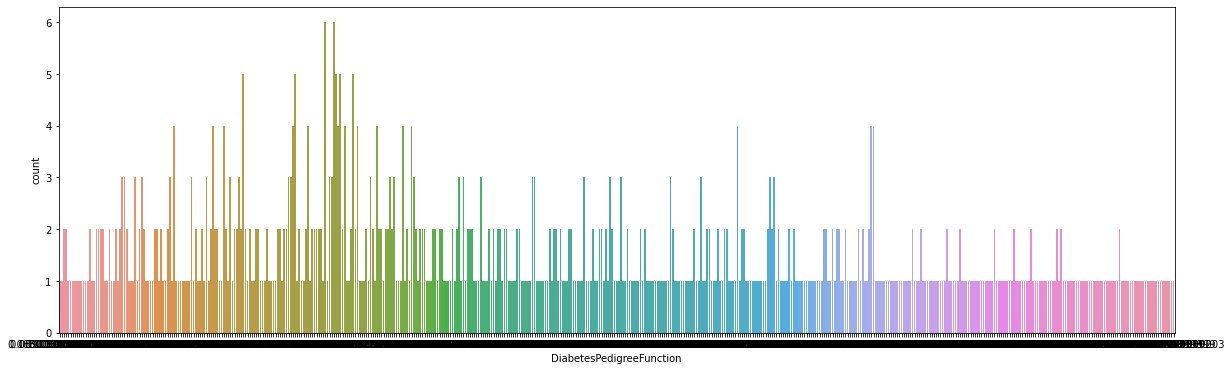

In [14]:
# Count plot for DiabetesPedigreeFunction 
plt.figure(figsize=(20, 6))
sns.countplot(df['DiabetesPedigreeFunction'])

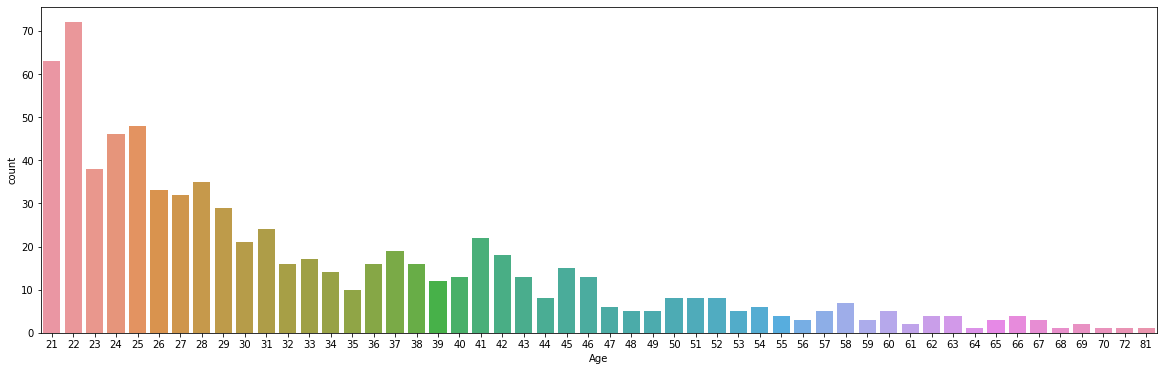

In [15]:
# Count plot for Age 
plt.figure(figsize=(20, 6))
sns.countplot(df['Age'])

## Week 2 : Data Exploration - 

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

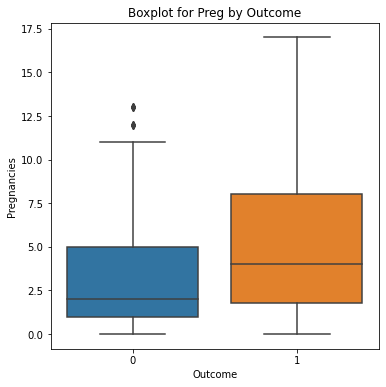

In [16]:
# Plots for count of outcome by values
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

* *In the boxplots, we find few outliers in both subsets. Some of the non-diabetic women have had many pregenancies.* *
* *To validate this hypothesis, we need to statistically test it.* *

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

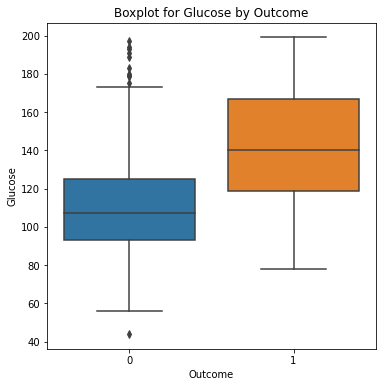

In [17]:
# Plot for glucose
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Glucose)
plt.title("Boxplot for Glucose by Outcome")

* *Glucose data is slightly skewed to right the data set contains over 60% who are diabetic and its likely that their Glucose levels were higher.* *
* *visually skewness seems acceptable (<2) and its also likely that confidence intervels of the means are not overlapping.* *
* *So a hypothesis that Glucose is measure of outcome, is likely to be true. But needs to be statistically tested.* *

Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

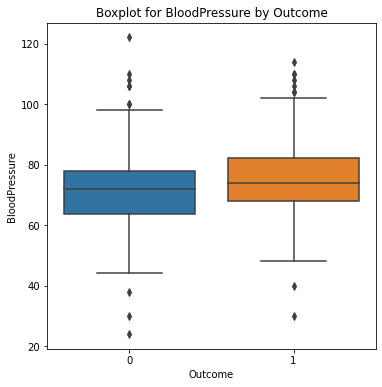

In [18]:
# Plot for BloodPressure
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.BloodPressure)
plt.title("Boxplot for BloodPressure by Outcome")

* *Few outliers in the data. Its likely that some people have low and some have high BloodPressure.* * 
* *So the association between diabetic (Outcome) and BloodPressure needs to be statistically tested.* *

Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome')

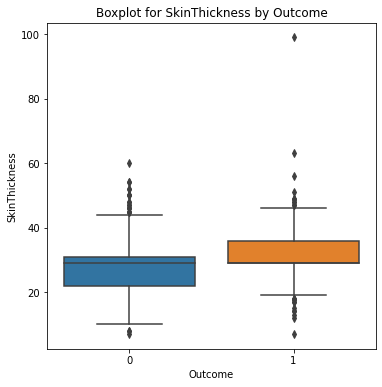

In [19]:
# Plot for SkinThickness
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.SkinThickness)
plt.title("Boxplot for SkinThickness by Outcome")

* *People who are not diabetic have lower skin thickness. This hypothesis needs to be validated.* *
* *As data of non-diabetic is skewed but diabetic samples seems to be normally distributed.* *

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

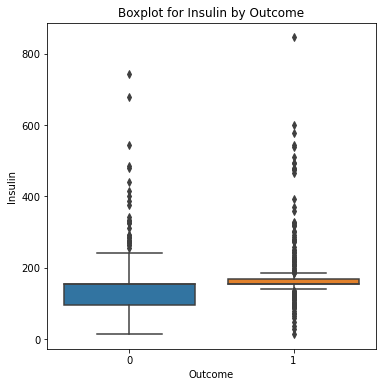

In [20]:
# plot for Insulin
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Insulin)
plt.title("Boxplot for Insulin by Outcome")

* *There are Outliers in this data. These Outliers are concern for us and most of them with higher insulin values are also diabetic.* *

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

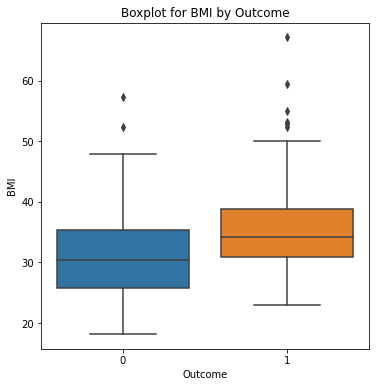

In [21]:
# Plot for BMI
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.BMI)
plt.title("Boxplot for BMI by Outcome")

* *BMI also has outliers. People on the higher side of BMI have diabetes.* *

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

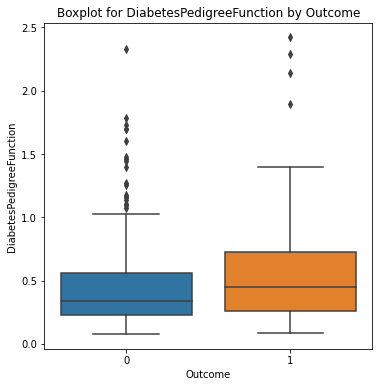

In [22]:
# Plot for Diabetes Pedigree Function
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

* *As Diabetes Pedigree Function increases, there is a strong likelihood of being diabetic, but needs statistical evaluated.* *

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

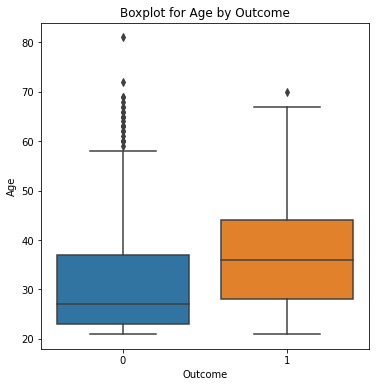

In [23]:
# Plot for Age
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Age)
plt.title("Boxplot for Age by Outcome")

* *Age data also has outliers. The more the age goes up, the more people are prone to diabetes* *

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

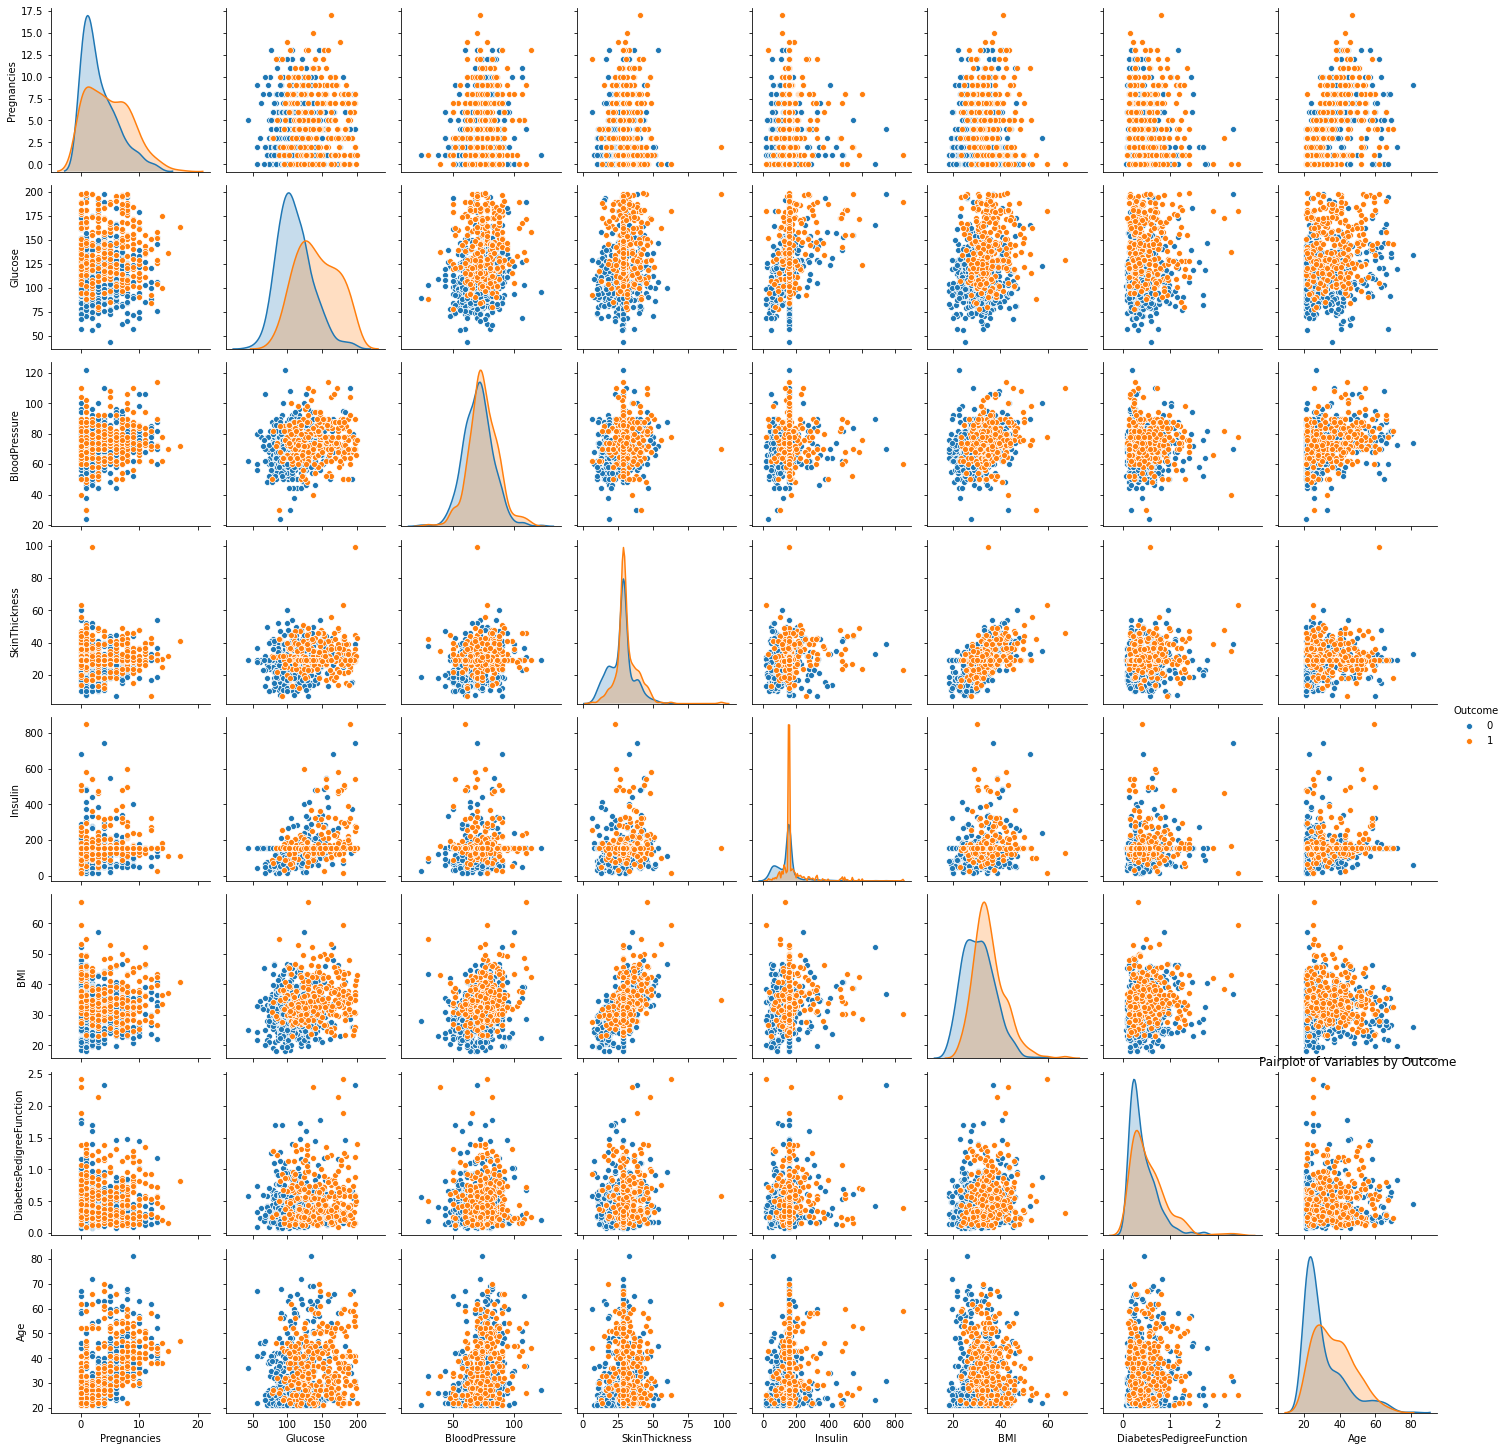

In [24]:
#scatter charts between the pair of variables to understand the relationships

sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

**The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,**

* *there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation.* *
* *Pregnancies and age have a linear line.* *
* *BloodPressure and age have little relation. Most of the aged people have BloodPressure.* *
* *Insulin and Glucose have some relation.* *

In [25]:
#Perform correlation analysis. Visually explore it using a heat map
cor = df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


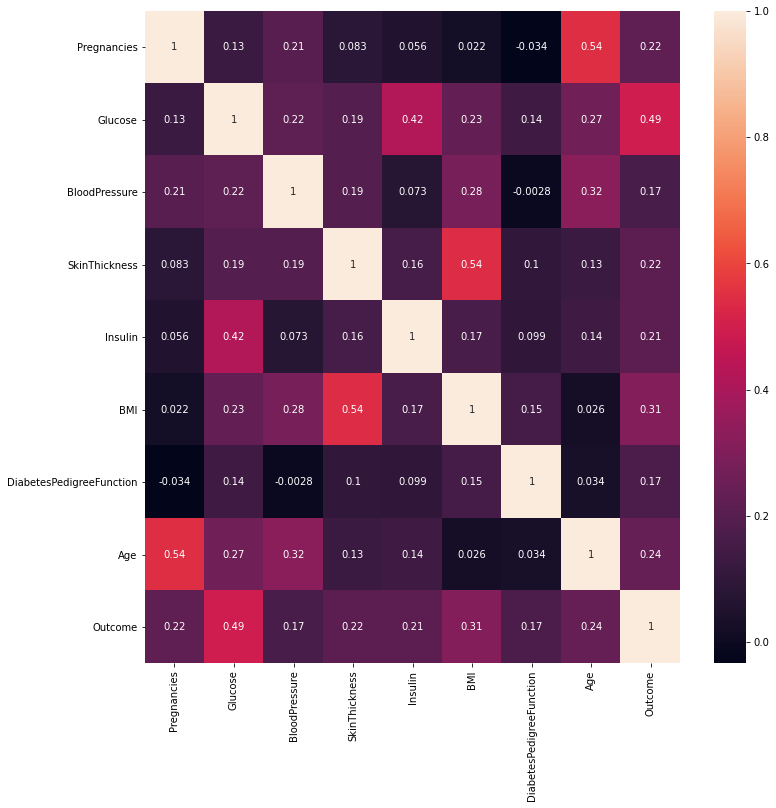

In [26]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

**The correlation plot shows the relation between the parameters.**

* *All variables are positively correlated to the Outcome.* *
* *Glucose is the most correlated to Outcome.* *
* *BloodPressure and DiabetesPedigreeFunction have low correlation with the outcome.* *
* *There is a high correlation between Age and Pregnancies, BMI and Skin Thickness,Insulin and Glucose* *

## Week 3 : Data Modeling - 
    
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

###  Data Preprocessing

#### Scaling of Data

Scaling is done inorder to handle highly varying values present in the data. If scaling is not done, then any model built would tend to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. 

In [27]:
dataframe= df
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

In [28]:
colnames = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [29]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df_before_scale)

In [30]:
# read into data frame
colnames = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
df_scaled = pd.DataFrame(robust_scaled_df, columns=colnames)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,-0.012662,0.835226,0.000000,0.131868,0.665359,1.235294
1,-0.4,-0.790123,-0.387662,-0.021917,0.000000,-0.637363,-0.056209,0.117647
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471
3,-0.4,-0.691358,-0.387662,-0.879060,-1.807678,-0.472527,-0.537255,-0.470588
4,-0.6,0.493827,-2.012662,0.835226,0.365710,1.175824,5.007843,0.235294


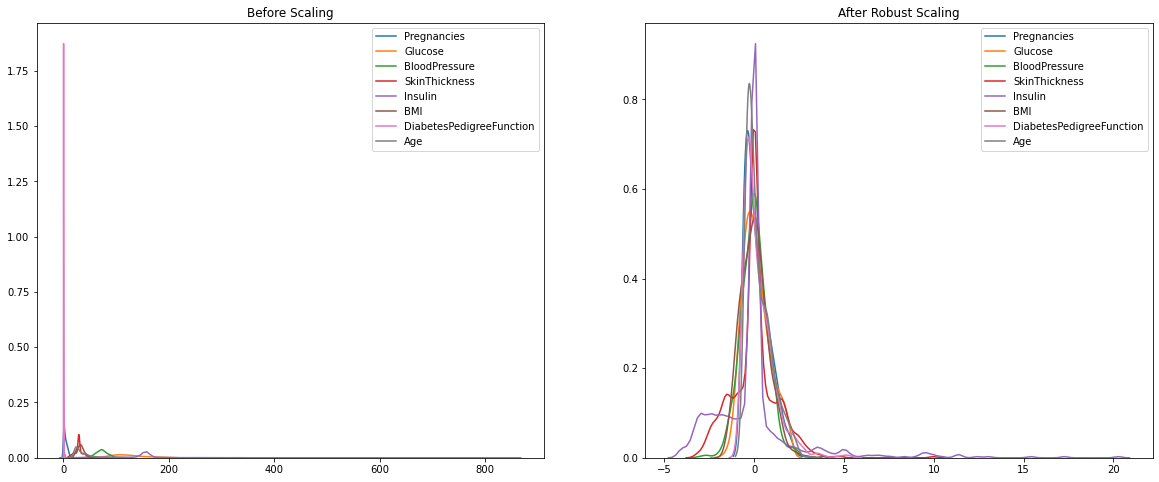

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['Pregnancies'], ax=ax1)
sns.kdeplot(df_before_scale['Glucose'], ax=ax1)
sns.kdeplot(df_before_scale['BloodPressure'], ax=ax1)
sns.kdeplot(df_before_scale['SkinThickness'], ax=ax1)
sns.kdeplot(df_before_scale['Insulin'], ax=ax1)
sns.kdeplot(df_before_scale['BMI'], ax=ax1)
sns.kdeplot(df_before_scale['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(df_before_scale['Age'],  ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(df_scaled['Pregnancies'], ax=ax2)
sns.kdeplot(df_scaled['Glucose'], ax=ax2)
sns.kdeplot(df_scaled['BloodPressure'], ax=ax2)
sns.kdeplot(df_scaled['SkinThickness'], ax=ax2)
sns.kdeplot(df_scaled['Insulin'], ax=ax2)
sns.kdeplot(df_scaled['BMI'], ax=ax2)
sns.kdeplot(df_scaled['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(df_scaled['Age'],  ax=ax2);

#### Feature Selection

As we saw above that all features have some correlation to the outcome, i.e., if the person is diabetic or non-diabetic, we will use all of them for or model building

In [32]:
#feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#X = df[feature_cols] 
#y= df['Outcome'] 

In [33]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

### Model Building - 

Logistic Regression works best when data is mostly numerical and when variables depends on target somewhat linearly, as seen in the scatterplots above. Shall build models using Support Vector Classifier, Random Forest (Ensemble Learning), Decision Tree, Naive Bayes, Xgboost and offcourse KNN (as we need to compare our results with KNN as per the task) to see if i can improve accuracy.

#### Logistic Regression

In [34]:
lr_model = LogisticRegression(C=0.01,max_iter=50000,n_jobs=5) 
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

Model Validation ==>

Accuracy Score of Logistic Regression Model:: 0.8052

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       107
         1.0       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154
 


 ROC Curve


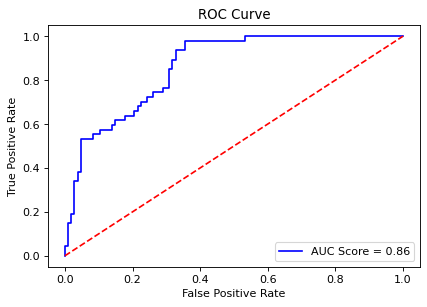

In [35]:
print("Model Validation ==>\n")
lr = metrics.accuracy_score(y_test,lr_pred)

print("Accuracy Score of Logistic Regression Model:: %0.4f"%lr)
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(X_test)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### Support Vector Classifier

In [36]:
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(X_train,y_train)
svc_pred=svc_model_linear.predict(X_test)

Model Validation ==>

Accuracy Score of SVC Model with Linear Kernel:: 0.8052

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       107
         1.0       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154
 


 ROC Curve


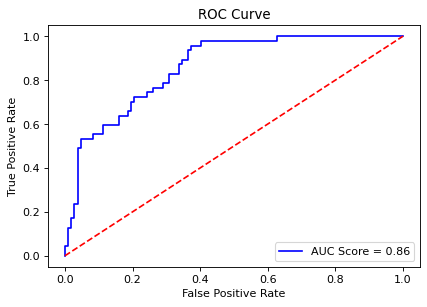

In [37]:
print("Model Validation ==>\n")

svc = metrics.accuracy_score(y_test,svc_pred)

print("Accuracy Score of SVC Model with Linear Kernel:: %0.4f"%svc)

print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(X_test)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### Random Forest

In [38]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

Model Validation ==>

Accuracy Score of Random Forest:: 0.8182

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       107
         1.0       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154
 


 ROC Curve


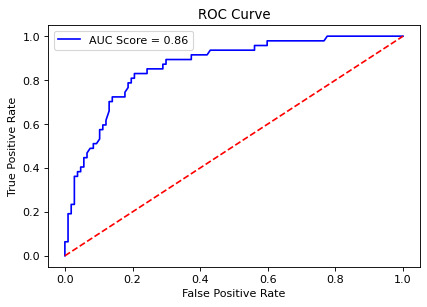

In [39]:
print("Model Validation ==>\n")
rf = metrics.accuracy_score(y_test,rf_pred)

print("Accuracy Score of Random Forest:: %0.4f"%rf)

print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(X_test)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### Naive Bayes

In [40]:
nb_model = GaussianNB() 
nb_model.fit(X_train,y_train)
nb_pred=nb_model.predict(X_test)

Model Validation ==>

Accuracy Score of Naive Bayes Model:: 0.7857

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


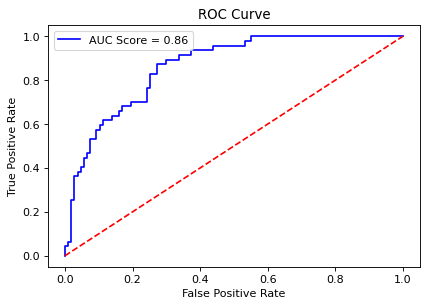

In [41]:
print("Model Validation ==>\n")

nb = metrics.accuracy_score(y_test,nb_pred)

print("Accuracy Score of Naive Bayes Model:: %0.4f"%nb)
print("\n","Classification Report::")
print(metrics.classification_report(y_test,nb_pred),'\n')
print("\n","ROC Curve")
nb_prob=nb_model.predict_proba(X_test)
nb_prob1=nb_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,nb_prob1)
roc_auc_nb=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_nb)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### XGBoost

In [42]:
xgb_model = XGBClassifier(n_estimators=10000,learning_rate=0.007)
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)

Model Validation ==>

Accuracy Score of XGBoost Model:: 0.7922

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       107
         1.0       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154
 


 ROC Curve


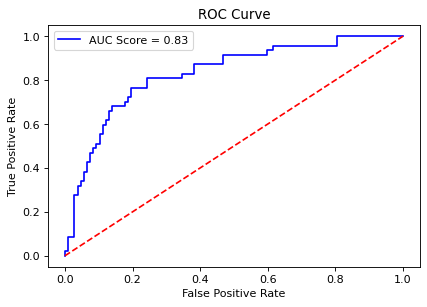

In [43]:
print("Model Validation ==>\n")

xgb = metrics.accuracy_score(y_test,xgb_pred)

print("Accuracy Score of XGBoost Model:: %0.4f"%xgb)
print("\n","Classification Report::")
print(metrics.classification_report(y_test,xgb_pred),'\n')
print("\n","ROC Curve")
xgb_prob=xgb_model.predict_proba(X_test)
xgb_prob1=xgb_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,xgb_prob1)
roc_auc_xgb=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_xgb)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### Decision Tree Classifier

In [44]:
Dtc_model = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.00575)
Dtc_model.fit(X_train, y_train)
Dtc_pred=Dtc_model.predict(X_test)

Model Validation ==>

Accuracy Score of Decision Tree Model:: 0.7338

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       107
         1.0       0.57      0.49      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154
 


 ROC Curve


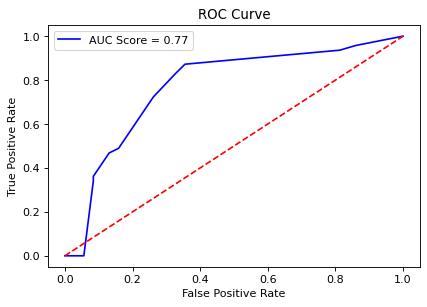

In [45]:
print("Model Validation ==>\n")

dt = metrics.accuracy_score(y_test,Dtc_pred)

print("Accuracy Score of Decision Tree Model:: %0.4f"%dt)
print("\n","Classification Report::")
print(metrics.classification_report(y_test,Dtc_pred),'\n')
print("\n","ROC Curve")
Dtc_prob=Dtc_model.predict_proba(X_test)
Dtc_prob1=Dtc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,Dtc_prob1)
roc_auc_Dtc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_Dtc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### KNN

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(X_train,y_train)
knn_pred=knn_model.predict(X_test)

Model Validation ==>

Accuracy Score of KNN Model:: 0.8052

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154
 


 ROC Curve


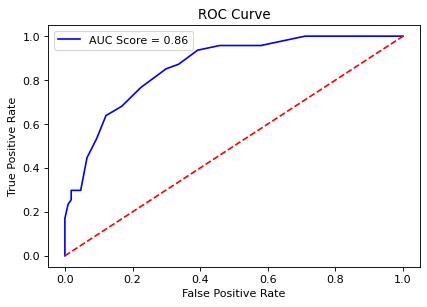

In [47]:
print("Model Validation ==>\n")

knn = metrics.accuracy_score(y_test,knn_pred)

print("Accuracy Score of KNN Model:: %0.4f"%knn)
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(X_test)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [48]:
print("Logistic Regression -  Accuracy Score = %0.4f"%lr, "   AUC Score = %0.4f"%roc_auc_lr)
print("SVC Model -            Accuracy Score = %0.4f"%svc, "   AUC Score = %0.4f"%roc_auc_svc)
print("Random Forest -        Accuracy Score = %0.4f"%rf, "   AUC Score = %0.4f"%roc_auc_rf)
print("Naive Bayes -          Accuracy Score = %0.4f"%nb, "   AUC Score = %0.4f"%roc_auc_nb)
print("XGBoost -              Accuracy Score = %0.4f"%xgb, "   AUC Score = %0.4f"%roc_auc_xgb)
print("Decision Tree -        Accuracy Score = %0.4f"%dt, "   AUC Score = %0.4f"%roc_auc_Dtc)
print("KNN -                  Accuracy Score = %0.4f"%knn, "   AUC Score = %0.4f"%roc_auc_knn)

Logistic Regression -  Accuracy Score = 0.8052    AUC Score = 0.8608
SVC Model -            Accuracy Score = 0.8052    AUC Score = 0.8580
Random Forest -        Accuracy Score = 0.8182    AUC Score = 0.8643
Naive Bayes -          Accuracy Score = 0.7857    AUC Score = 0.8632
XGBoost -              Accuracy Score = 0.7922    AUC Score = 0.8290
Decision Tree -        Accuracy Score = 0.7338    AUC Score = 0.7701
KNN -                  Accuracy Score = 0.8052    AUC Score = 0.8604


In the steps above, I created some models and compared it with KNN as suggested in the task. By looking at the Accuracy Score and AUC score, I would conclude that Random Forest is by far the best model for the dataframe, as 

**"the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes".**

Also, as part of Tasks in Week 4, where I have to create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. I have already generated the classification report above. However, I shall create a Precision-Recall curve and re-evaluate which model is the best suited for me.

## Week 4 : Data Modeling - 

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Like mentioned above I shall be creating a Precision-Recall curve to re-evaluate which model is the best suited for me.

##### Logistic Regression

f1=0.634 auc=0.726 ap=0.727


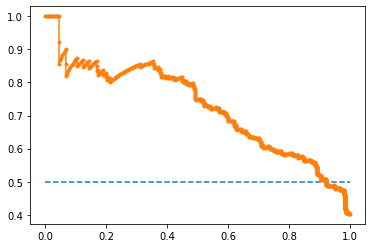

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = lr_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = lr_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### Suport Vector Classifier

f1=0.629 auc=0.725 ap=0.726


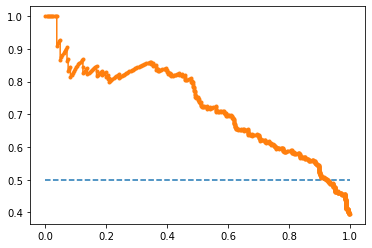

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = svc_model_linear.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = svc_model_linear.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### Random Forest

f1=0.948 auc=0.982 ap=0.982


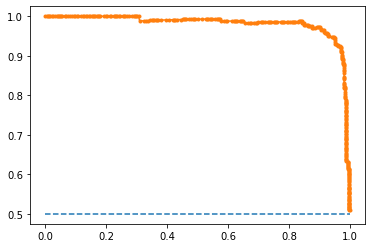

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = rf_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = rf_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### Naive Bayes

f1=0.638 auc=0.680 ap=0.683


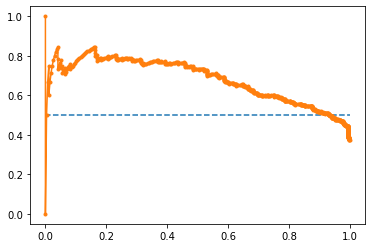

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = nb_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = nb_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### XGBoost

f1=0.941 auc=0.956 ap=0.956


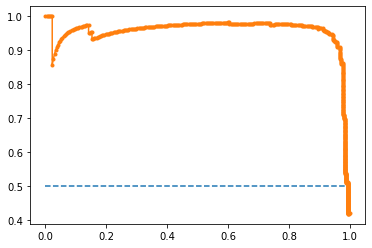

In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = xgb_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = xgb_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### Decision Tree

f1=0.685 auc=0.699 ap=0.702


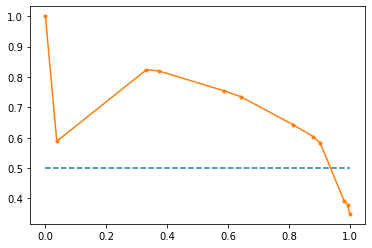

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = Dtc_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = Dtc_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

##### KNN

f1=0.628 auc=0.727 ap=0.712


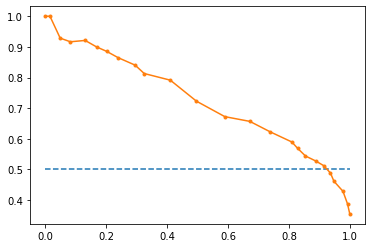

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = knn_model.predict_proba(X) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
yhat = knn_model.predict(X) # predict class values
precision, recall, thresholds = precision_recall_curve(y, probs) # calculate precision-recall curve
f1 = f1_score(y, yhat) # calculate F1 score
auc = auc(recall, precision) # calculate precision-recall AUC
ap = average_precision_score(y, probs) # calculate average precision score

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--') # plot no skill
plt.plot(recall, precision, marker='.') # plot the precision-recall curve for the model

**Sensitivity** measures the proportion of positives that are correctly identified whereas **Specificity** measures the proportion of negatives that are correctly identified. Sensitivity and Specificity are inversely proportional to each other. So, when we increase Sensitivity, Specificity decreases and vice versa. Since FPR = 1- Specificity, when we increase TPR, FPR also increases and vice versa.

**Precision-Recall** is a useful measure of success of prediction when the classes are very imbalanced. 

**Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. From the positive predictions what proportion of it is correct.

**Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives.

These quantities are also related to the **(F1)** score, which is defined as the harmonic mean of precision and recall. **A F1 measure reaches its best value at 1 and its worst score at 0.**

The **Average precision (AP)** score function computes the average precision (AP) from prediction scores. **The value is between 0 and 1 and higher is better.**

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. **High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**

***An excellent model has AUC near to the 1 which means it has good measure of separability, i.e., Higher the AUC, better the model is at distinguishing between patients with disease and no disease.***

### To conclude:- 

      Since the F1, AP and AUC values (f1=0.948 auc=0.982 ap=0.982) for Random Forest is the closet to 1, I would say the it is the best model for this dataset 

## Week 4 : Data Reporting - 

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a. Pie chart to describe the diabetic or non-diabetic population

    b. Scatter charts between relevant variables to analyze the relationships

    c. Histogram or frequency charts to analyze the distribution of the data

    d. Heatmap of correlation analysis among the relevant variables

    e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

https://public.tableau.com/profile/ankita.agarwal6443#!/vizhome/Capstone-Healthcare_15991410015020/Healthcare?publish=yes